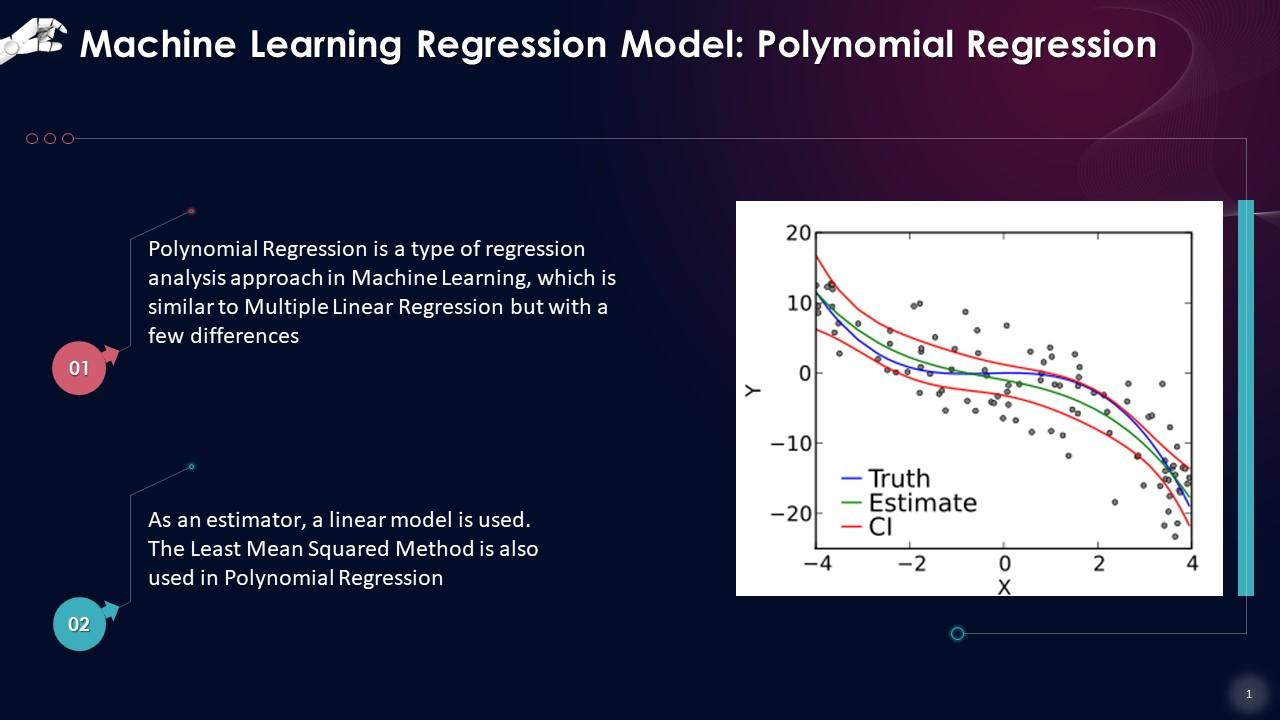

In [368]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [369]:
df=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Economy%20of%20Scale.csv')

In [370]:
df.head()

,Units,Cost
0,1.0,95.1
1,1.2,96.5
2,1.2,73.7
3,1.2,95.6
4,1.3,98.8


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Units   1000 non-null   float64
 1   Cost    1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [372]:
df.describe()

,Units,Cost
count,1000.000000,1000.000000
mean,4.471500,40.053200
std,1.336437,10.596183
min,1.000000,20.000000
25%,3.600000,32.900000
50%,4.400000,38.300000
75%,5.300000,44.525000
max,10.000000,100.000000


In [373]:
df.corr()

,Units,Cost
Units,1.000000,-0.760637
Cost,-0.760637,1.000000


Text(0, 0.5, 'Cost')

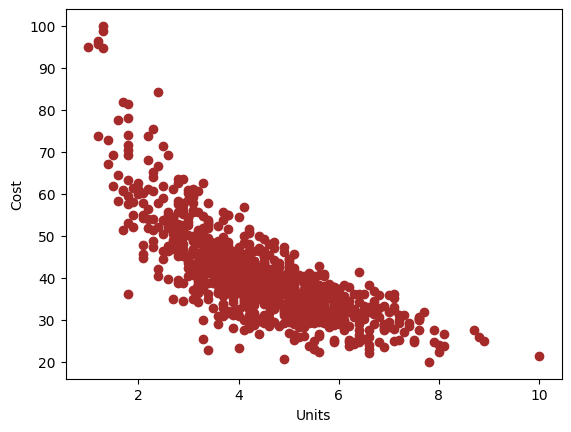

In [374]:
plt.scatter(df['Units'],df['Cost'],color='brown')
plt.xlabel('Units')
plt.ylabel('Cost')

Data set is not in linear fassion

In [375]:
X=df[['Units']]
y=df['Cost']

In [376]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [377]:
#standarizarion
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [378]:
pd.DataFrame(X_train).describe()

,0
count,8.000000e+02
mean,-3.286260e-16
std,1.000626e+00
min,-2.579988e+00
25%,-6.578966e-01
50%,-4.208075e-02
75%,6.297183e-01
max,4.138002e+00


In [379]:
pd.DataFrame(X_test).describe()

,0
count,200.000000
mean,0.056450
std,0.986466
min,-2.206767
25%,-0.564591
50%,0.032564
75%,0.629718
max,3.316915


In [380]:
#Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [402]:
poly=PolynomialFeatures(degree=6,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [403]:
## Lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [404]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

LinearRegression()

In [405]:
regression.coef_

array([ 0.        , -7.53389579,  1.50429244,  0.47307924,  0.09404997,
       -0.21445626,  0.03762536])

In [406]:
regression.intercept_

38.09492132068

#Model is Trained

In [407]:
y_train_pred=regression.predict(X_train_poly)
y_test_pred=regression.predict(X_test_poly)

In [408]:
from sklearn.metrics import r2_score

In [409]:
train_accuracy = r2_score(y_train, y_train_pred)

test_accuracy = r2_score(y_test, y_test_pred)

In [410]:
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Train Accuracy: 0.7132758802629263
Test Accuracy: 0.6096054572551544


In [411]:
## Performance Metrics for Trian Data
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_train,y_train_pred)
mae=mean_absolute_error(y_train,y_train_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

34.320076885509536
4.433239752866988
5.8583339684170905


In [412]:
## Performance Metrics for Test Data
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

31.921654483328684
4.302645270104011
5.649925175020345


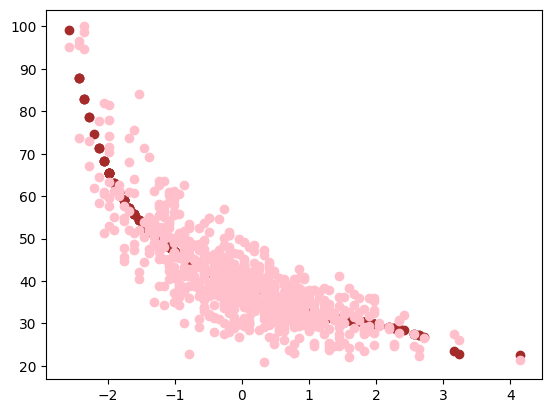

In [413]:
plt.scatter(X_train,regression.predict(X_train_poly),color='brown')
plt.scatter(X_train,y_train,color='pink')

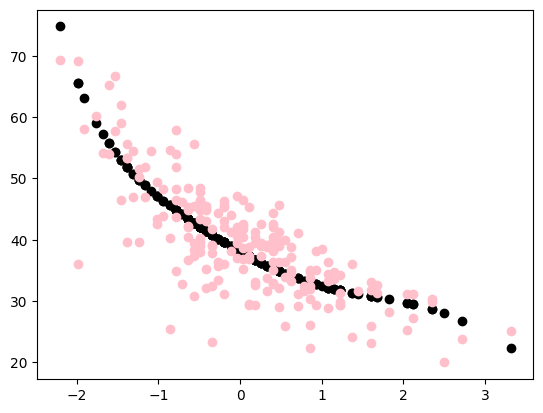

In [414]:
plt.scatter(X_test,regression.predict(X_test_poly),color='black')
plt.scatter(X_test,y_test,color='pink')

In [415]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train_poly,y_train,scoring='neg_mean_squared_error',cv=5)

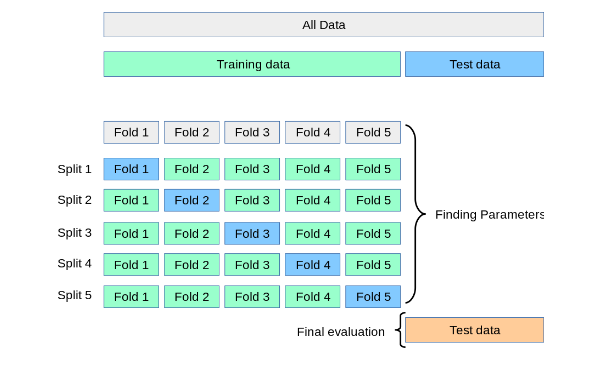

In [416]:
np.mean(validation_score)

-41.99054147104812

In [417]:
## prediction
y_pred=regression.predict(X_test_poly)

In [418]:
y_pred

array([37.85120217, 34.06124192, 34.06124192, 35.31744492, 39.58863675,
       34.87506778, 35.78259663, 37.85120217, 32.1893577 , 47.97406901,
       33.02138694, 51.87287953, 35.31744492, 29.74300157, 30.82807802,
       31.73499348, 42.76594262, 31.9532566 , 33.69052861, 41.45497502,
       37.30510993, 46.34703687, 40.19735477, 37.85120217, 44.8497419 ,
       44.13689837, 49.78896735, 28.68727102, 31.73499348, 30.66359235,
       40.81958123, 47.14119457, 35.78259663, 38.41458214, 40.19735477,
       45.58501599, 34.87506778, 36.77751918, 31.73499348, 54.33421385,
       41.45497502, 49.78896735, 42.10358685, 29.74300157, 42.10358685,
       42.76594262, 31.16474315, 36.26963366, 39.58863675, 32.72205711,
       36.77751918, 31.9532566 , 43.44313143, 36.77751918, 65.57322473,
       63.15034568, 35.78259663, 74.76113731, 44.8497419 , 33.02138694,
       42.10358685, 55.74885763, 37.30510993, 44.8497419 , 36.26963366,
       34.87506778, 35.31744492, 32.1893577 , 51.87287953, 37.30

In [419]:
## Performance Metrics - testing data
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

31.921654483328684
4.302645270104011
5.649925175020345


In [420]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.6096054572551544
0.6076337676453318


In [421]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[   1.        ,   -3.        ,    9.        , ...,   81.        ,
        -243.        ,  729.        ],
       [   1.        ,   -2.96984925,    8.82000455, ...,   77.79248018,
        -231.03193862,  686.13002878],
       [   1.        ,   -2.93969849,    8.64182723, ...,   74.68117781,
        -219.54014584,  645.38183575],
       ...,
       [   1.        ,    2.93969849,    8.64182723, ...,   74.68117781,
         219.54014584,  645.38183575],
       [   1.        ,    2.96984925,    8.82000455, ...,   77.79248018,
         231.03193862,  686.13002878],
       [   1.        ,    3.        ,    9.        , ...,   81.        ,
         243.        ,  729.        ]])

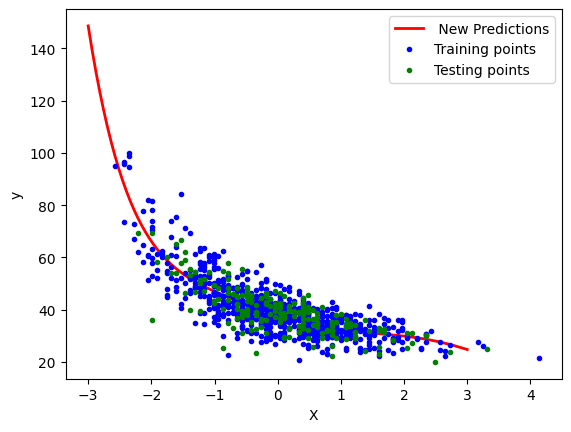

In [422]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()